# About
This notebook illustrates how to run an Analysis of Variance (ANOVA) in R. 
It is used as a companion for a lecture in the CS-411 course "Digital Education". 
Patrick Jermann, CEDE, EPFL

## Tools to run this notebook

### Simple
Jupyter Notebooks with R kernel

* http://noto.epfl.ch
* Does not require any installation on your machine

### More involved 

R and Rstudio IDE

* https://rstudio.com/products/rstudio/download/#download
* Requires installation of the R language and Rstudio editor.

Alternatively, you can do the analyses in Python in NOTO or in your favourite computing environment, but I provide examples in R

# References

Seltman, H. J. (2012). Experimental design and analysis. 

http://www.stat.cmu.edu/~hseltman/309/Book/

* t-test: chapter 6
* ANOVA: chapter 7
* Regression: chapter 10
* Chi-square: chapter 16

Jose, P. E. (2013). Doing statistical mediation and moderation. Guilford Press. 
https://books.google.ch/books?id=aJFcO81Ro-0C&printsec=copyright&redir_esc=y#v=onepage&q&f=false

* Basic Mediation: chapter 3
* Basic Moderation: chapter 5


# A cheat-sheet to determine which test to use
Different statisticatl tests are appropriate depending on the type of Independent and Dependent variables and on the type of hypotheses we want to test. 

![TestGrid](./images/test-grid.png)

![Alternative tests](./images/test-grid-alternatives.png)

![Statistical testing](./images/statistical-inference.png)

# Mediation

* explains how or why an intervention works
* mediator explains all or part of the treatment’s impact on an intended outcome
* is an intermediate outcome that is measured or observed after the onset of the intervention. E.g. fidelity of application, how many questions were asked ?

# Moderation

* explains who the intervention benefits or what conditions must exist for the intervention to be effective.
* a factor that reflects who is most affected by the treatment
* a factor that exists prior to the introduction of an intervention
Eg. student characteristics, such as special education status, gender, …

![Overview](./images/variable-triangle.png)

# Experiment (IPS vs PSI)

In this **imaginary** experiment, we are studying the effect of the order of instruction and problem-solving (independent variable) on learning (dependent variable) how the position of the earth relative to the sun influences seasons.

Participants used a simulation (https://astro.unl.edu/classaction/animations/coordsmotion/eclipticsimulator.html) during the problem-solving phase and watched a video during the instruction phase.

![Simulator](./images/season-simulator.png)

## Participants

The sample consisted of N=200 participants. 

## Independent variable

*Order of instruction* The independent variable has two modalities (also called conditions):

* I-PS : instruction followed by problem-solving
* PS-I : problem-solving followed by instruction

Participants were *randomly* assigned to one of the experimental conditions. 

## Dependent variable

*Learning gain*. Participants completed a 10 question *pre-test* before starting the experiment. The pre-test was a series of questions about their understanding of the sun-earth relative positions. After the experiment, particpants completed a 10 question *post-test* with similar questions as the pre-test. The learning gain was computed as :

$learning.gain = post.test - pre.test$

another possibilty would be the relative learning gain

$rel.gain = \frac{post.test - pre.test}{max - pre.test}$

## Control variables

*Age group*. Participants were recruited among highschool students who are interested in following studies at EPFL (kids), students doing their bachelor as well as alumni who are active professionally (professionals).

Young learners (e.g., second to fifth graders) may have insufficient prior knowledge about cognitive and metacognitive learning strategies to generate multiple solutions during initial problem solving

*Gender*. Experimenters also asked for the gender of the participants, either Male (M) or Female (M).

*Self-regulation skills*. Participants also filled in a questionnaire about their self.regulation skills by using the Learning Companion (https://companion.epfl.ch)

## Intermediate / Process variables

*Solutions*. The simulation system logged every simulation run and counted how often students used the simulation to generate a potential solution.


![Overview](./images/overview.png)

## Dataset

This dataset was generated to illustrate basic statistical techniques like ANOVA and regression as well lightly more advanced techniques like mediation and moderation. However, we tried as much as possible to implement variations compatible with insights found in the literature about Productive Failure:

Sinha, T., & Kapur, M. (2021). When Problem Solving Followed by Instruction Works: Evidence for Productive Failure. Review of Educational Research, 91(5), 761–798. https://doi.org/10.3102/00346543211019105


# Analysis

## Loading libraries


In [35]:
library(tidyverse) # Give ggplot, read_delim, tidyr, etc.
library(janitor) # Gives tabyl
library(gplots) # Gives plotmeans
library(ggstatsplot) # Gives pretty plotting 
library(car) # Gives Anova
library(Hmisc) # Gives mean_cl_boot 

## Loading data


In [36]:
# Here we read the data and then convert the factors to the right labels
df <- read_delim(file="data.csv", delim=",") %>%
  mutate(condition = factor(condition,labels=c("IPS","PSI")),
         studies= factor(studies,
                           labels=c("bachelor","high school","master")))

head(df)


New names:
• `` -> `...1`
Rows: 19 Columns: 43
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): Email address, State, Time taken, age.group, studies, python, Res...
dbl  (25): ...1, Response 7, Grade/10.00_pre, Q. 1 /2.50_pre, Q. 2 /2.50_pre...
lgl   (2): recursion, complexity
time  (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Email address,State,Time taken,age.group,studies,python,recursion,complexity,Response 6,⋯,nb_tests,tot_minutes,success,timestamp,passed,fast_enough,Q6_score_y,Q7_score_y,Q8_score_y,prog_score_y
<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<lgl>,<lgl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,rayan.rami@unil.ch,Finished,3 mins 22 secs,18-24 years,high school,"Yes, in Python",TRUE,FALSE,{8} {True} {True},⋯,7,6.266667,0,"[3.85, 3.9333333333333336, 4.05, 4.266666666666667, 4.716666666666667, 6.083333333333333, 6.266666666666667]","[4, 4, 4, 4, 4, 0, 4]","[4, 4, 4, 4, 4, 0, 4]",0.6666667,1,0,1.666667
1,dp.moodle2023+13@gmail.com,Finished,2 mins 43 secs,18-24 years,high school,"Yes, in Python",TRUE,TRUE,{8} {True} {False},⋯,3,11.700000,1,"[7.216666666666667, 10.9, 11.7]","[4, 5, 5]","[4, 5, 5]",1.0000000,1,0,2.000000
2,dp.moodle2023+17@gmail.com,Finished,3 mins 39 secs,25-34 years,bachelor,"Yes, in Python",TRUE,TRUE,{8} {4} {KeyError},⋯,0,0.000000,0,NA,NA,NA,0.3333333,1,0,1.333333
3,dp.moodle2023+18@gmail.com,Finished,10 mins 53 secs,25-34 years,master,"Yes, in Python",TRUE,TRUE,{8} {True} {False},⋯,8,11.966667,0,"[2.033333333333333, 4.266666666666667, 4.45, 5.183333333333334, 5.8, 10.116666666666667, 11.466666666666667, 11.966666666666667]","[0, 0, 0, 0, 4, 4, 4, 4]","[5, 5, 0, 0, 4, 4, 4, 4]",1.0000000,1,1,3.000000
4,dp.moodle2023+12@gmail.com,Finished,4 mins 59 secs,18-24 years,bachelor,"Yes, in Python",TRUE,TRUE,{8} {True} {False},⋯,1,9.216667,0,[9.216666666666667],[2],[5],1.0000000,1,1,3.000000
5,amanmarkar@yahoo.co.uk,Finished,4 mins 52 secs,18-24 years,bachelor,"Yes, in Python",TRUE,TRUE,{8} {True} {False},⋯,4,7.683333,1,"[0.16666666666666666, 5.383333333333334, 7.616666666666667, 7.683333333333334]","[0, 5, 5, 5]","[5, 5, 5, 5]",1.0000000,1,0,2.000000


## Descriptives


In [37]:
summary(df)

#summary(df$learning)

      ...1      Email address         State            Time taken       
 Min.   : 0.0   Length:19          Length:19          Length:19         
 1st Qu.: 4.5   Class :character   Class :character   Class :character  
 Median : 9.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 9.0                                                           
 3rd Qu.:13.5                                                           
 Max.   :18.0                                                           
                                                                        
  age.group                studies     python          recursion      
 Length:19          bachelor   :8   Length:19          Mode :logical  
 Class :character   high school:6   Class :character   FALSE:2        
 Mode  :character   master     :5   Mode  :character   TRUE :17       
                                                                      
                                                             

# Dependent variable: learning gain


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


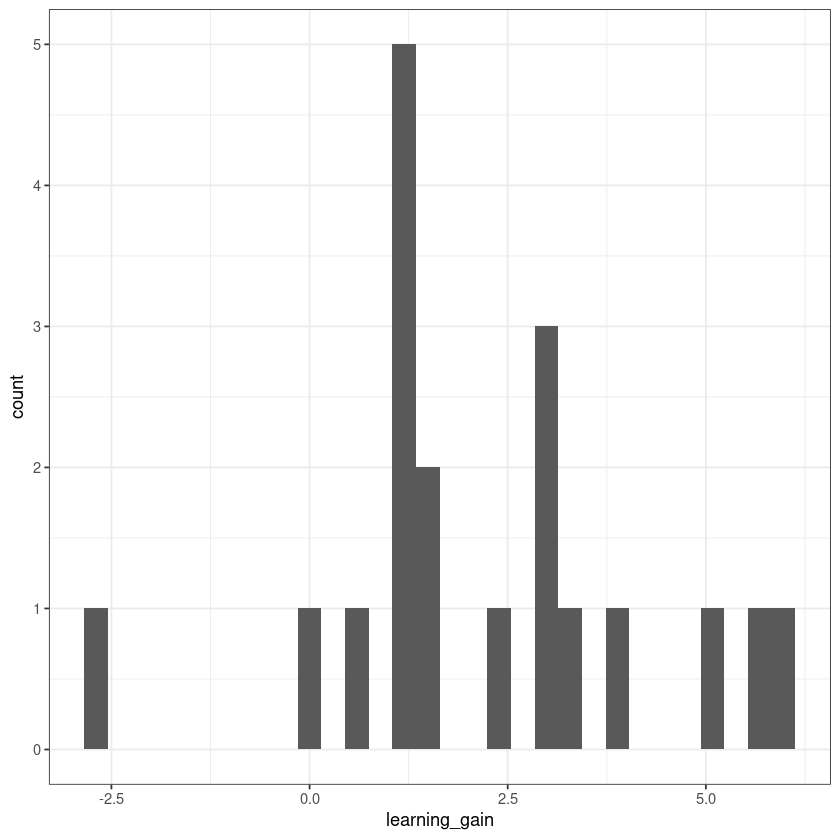

In [38]:
df %>% 
  ggplot(aes(x=learning_gain)) +
  geom_histogram() + 
  theme_bw() 


## Intermediate variable: solutions


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


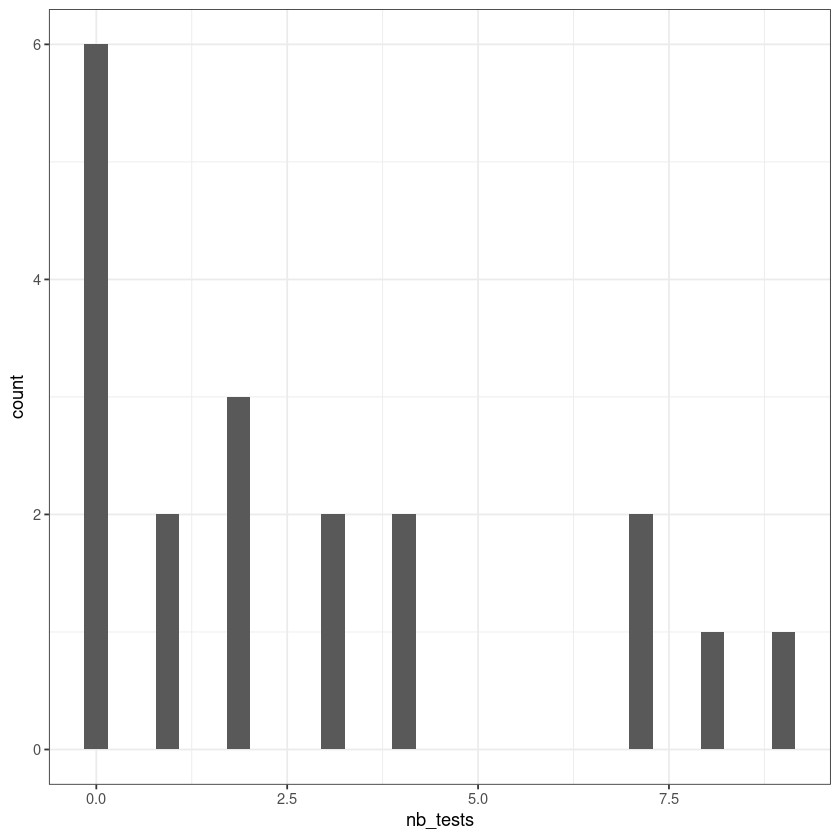

In [39]:
df %>% 
  ggplot(aes(x=nb_tests)) +
  geom_histogram() + 
  theme_bw() 


## Control variables

### Programming skills and Condition


In [40]:
#df %>% tabyl(condition, age.group)
#df %>% tabyl(condition, age.group) %>% chisq.test()
table(df$condition, df$python)

     
      Yes, but not in Python Yes, in Python
  IPS                      1              7
  PSI                      1             10

### Age Group and Condition


In [41]:
#df %>% tabyl(condition, age.group)
#df %>% tabyl(condition, age.group) %>% chisq.test()
table(df$condition, df$studies)

     
      bachelor high school master
  IPS        4           3      1
  PSI        4           3      4

### Age Group and Gender


In [42]:
#df %>% tabyl(gender, age.group)
#df %>% tabyl(gender, age.group) %>% chisq.test()
table(df$python, df$studies)

                        
                         bachelor high school master
  Yes, but not in Python        0           1      1
  Yes, in Python                8           5      4


## Question 1: Does the experimental treatment affect learning ? 

In other terms, does the manipulation of the IV affect the DV ? 

### Plotting

A straightforward way to look at the difference in learning gains given the experimental condition consists of looking at the means and confidence intervals of the dependent variable given the condition. This is done using `plotmeans`.

A visual way to "see" if there is a statistically significant difference consists of comparing the confidence intervals. If they overlap, there is no statistically significant difference.

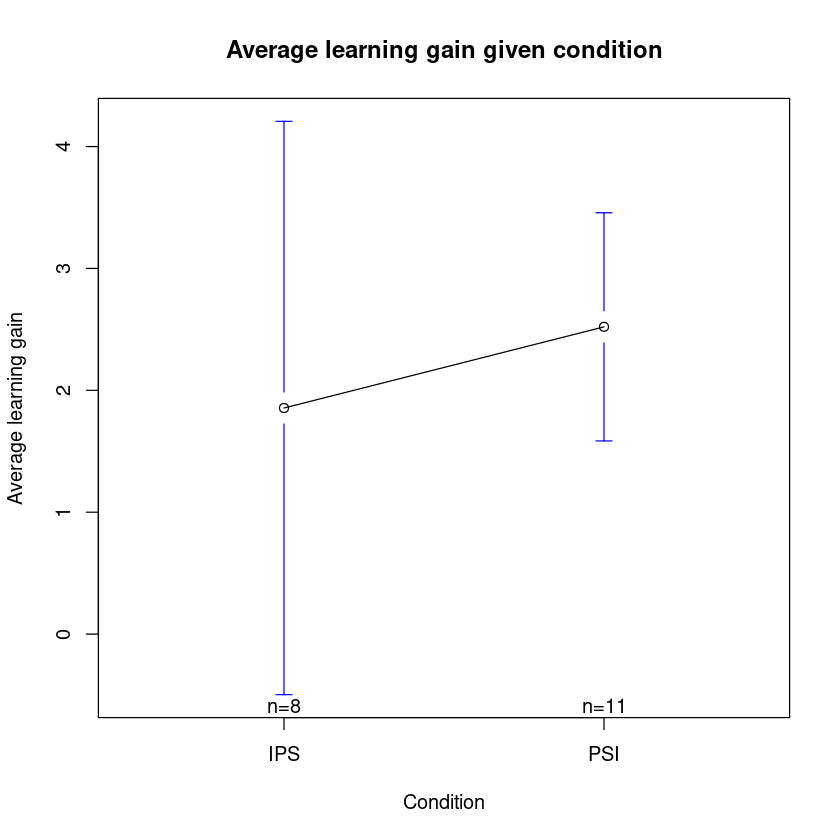

In [43]:
library(gplots) # Gives plotmeans
plotmeans(learning_gain ~ condition, 
          main="Average learning gain given condition",
          ylab="Average learning gain",
          xlab = "Condition",
          data=df)



A more sophisticated way to plot the same information is provided by `ggstatsplot` and its `ggbewteenstats()` function.


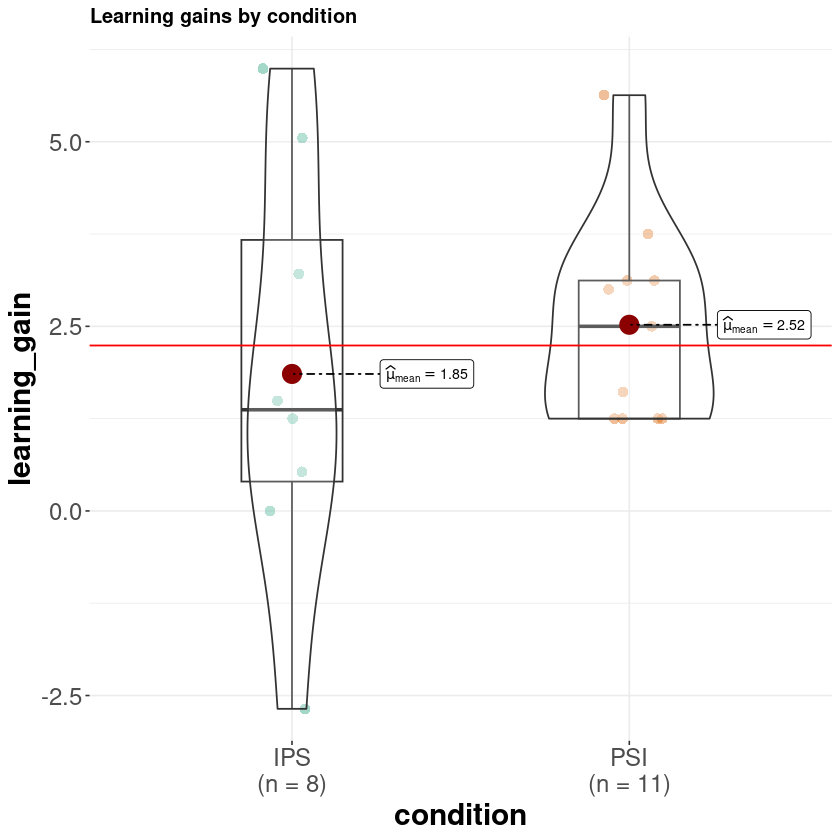

In [44]:
library(ggstatsplot) 
Y_bar <- mean(df$learning_gain)
ggbetweenstats(data = df, 
                            x = condition, 
                            y = learning_gain,
                            pairwise.comparisons = FALSE, 
                            results.subtitle=FALSE,
                            var.equal = TRUE,
                            outlier.tagging = FALSE, 
                            plot.type = "box", 
                            title = "Learning gains by condition", 
                            ggplot.component = list(theme(text = element_text(size = 18)))) +
  geom_hline(aes(yintercept=Y_bar), color="red" )
  


## ANOVA with one factor

ANOVA compares the variation "between" the groups and "within" the groups based on their ratio. It assumes that the measured variable is normally distributed in each group and that the variance is the same in each group.

$F = \frac{MeanSquares_{between}}{MeanSqares_{within}}$

The sample variance (Mean Sum of Squares) is computed as the Sums of Squares divided by the Degrees of freedom. 

$F = \frac{SS_{between}/df_{between}}{SS_{within}/df_{within}}$ 

If F is larger than 1, the differences between the groups are more important than the differences inside the groups.


### Total Variance: between and within groups
Variance is a measure of "spread" based on the average squared deviation from the mean. 

$SS_{total} = \sum_{i=1,j=1}^{n_i,k} (Y_{ij} - \bar{Y})^2$

### Mean Sums of Square between groups
$SS_{between} = \sum_{i=1}^{k}n_i(\bar{Y_i}-\bar{Y})^2$

Where $k$ is the number of groups $\bar{Y_i}$ is the mean for group $i$ and $\bar{Y}$ is the grand mean. We multiply by $n_i$ because we account for the difference between the group mean and the global mean for each observation.

Finally, we divide by the degrees of freedom: $MS_{Between} = SS_{between} / df_{within}$ where the $df_{within}$ is $k-1$.

### Mean Sums of Square within groups
For each group $i$ we have $SS_i = \sum_{j=1}^{n_i}(Y_{ij}-\bar{Y_i})^2$ which is essentially the difference between each observation $j$ of the group and the mean for that group.

To obtain the Mean sums of squares, we add up the $SS_i$ for each group: $SS_{within} = \sum_{i=1}^{k}SS_i$, we divide by the degrees of freedom : $MS_{within} = SS_{within} / df_{within}$ where the degrees of freedom are is the sum of the degrees of freedom for each subgroup.
$df_{within} = \sum_{i=1}^{k}df_i = \sum_{i=1}^{k}(n_i-1) = N - k$

## Computing Variances by hand in R 


In [45]:
Y_bar = mean(df$learning_gain) # The mean of learning for all subjects
Y_s = sd(df$learning_gain) # The standard deviation of the learning for all subjects


## Computing SStotal  


In [46]:
ss_total = sum((df$learning_gain - Y_bar)^2)
ss_total


[1] 76.87369

## Computing SSB


In [48]:
between_ss = function(x) {
    sum(length(x)*(mean(x) - Y_bar)^2)
}

ss_between = sum(tapply(df$learning_gain, df$condition, between_ss))
ss_between

mss_between = ss_between / 1 # (k groups - 1)
mss_between 

[1] 2.053804

[1] 2.053804

## Computing SSW


In [50]:
within_ss = function(x) {
    sum((x - mean(x))^2)
}
ss_within = sum(tapply(df$learning_gain, df$condition, within_ss))
ss_within

mss_within = ss_within / (length(df$learning_gain) - 2) # N - k groups
mss_within 


[1] 74.81989

[1] 4.40117


## The F-Ratio

$F = \frac{MeanSquares_{between}}{MeanSqares_{within}} = \frac{69.66193}{1.216678} = 57.25584$ 

In [51]:
# Compute the ratio of the between group variance to the within group variance
F = mss_between / mss_within
F

[1] 0.4666495



This F-ratio (computed from our experimental groups) is to be compared with a F distribution parametrised with df=1 (2 groups - 1) and df= 198 (200 subjects - 2 groups). 

The theoretical F distribution corresponds to the F-ratios that would be obtained when:

* two samples are drawn from two populations with means $\mu_1$ and $\mu_2$ 
* two populations have the same mean: $\mu_1 = \mu_2$. This corresponds to our *null hypothesis*.
* three populations have the same variance: $\sigma^2$


We generated 40000 runs of a simulation that draws two samples of 100 observations from a normal population with the same mean and variance. For each randomly generated example, we computed the F-ratio. Here is the distribution of these 40000 F-ratios and the corresponding F[1,198] distribution.


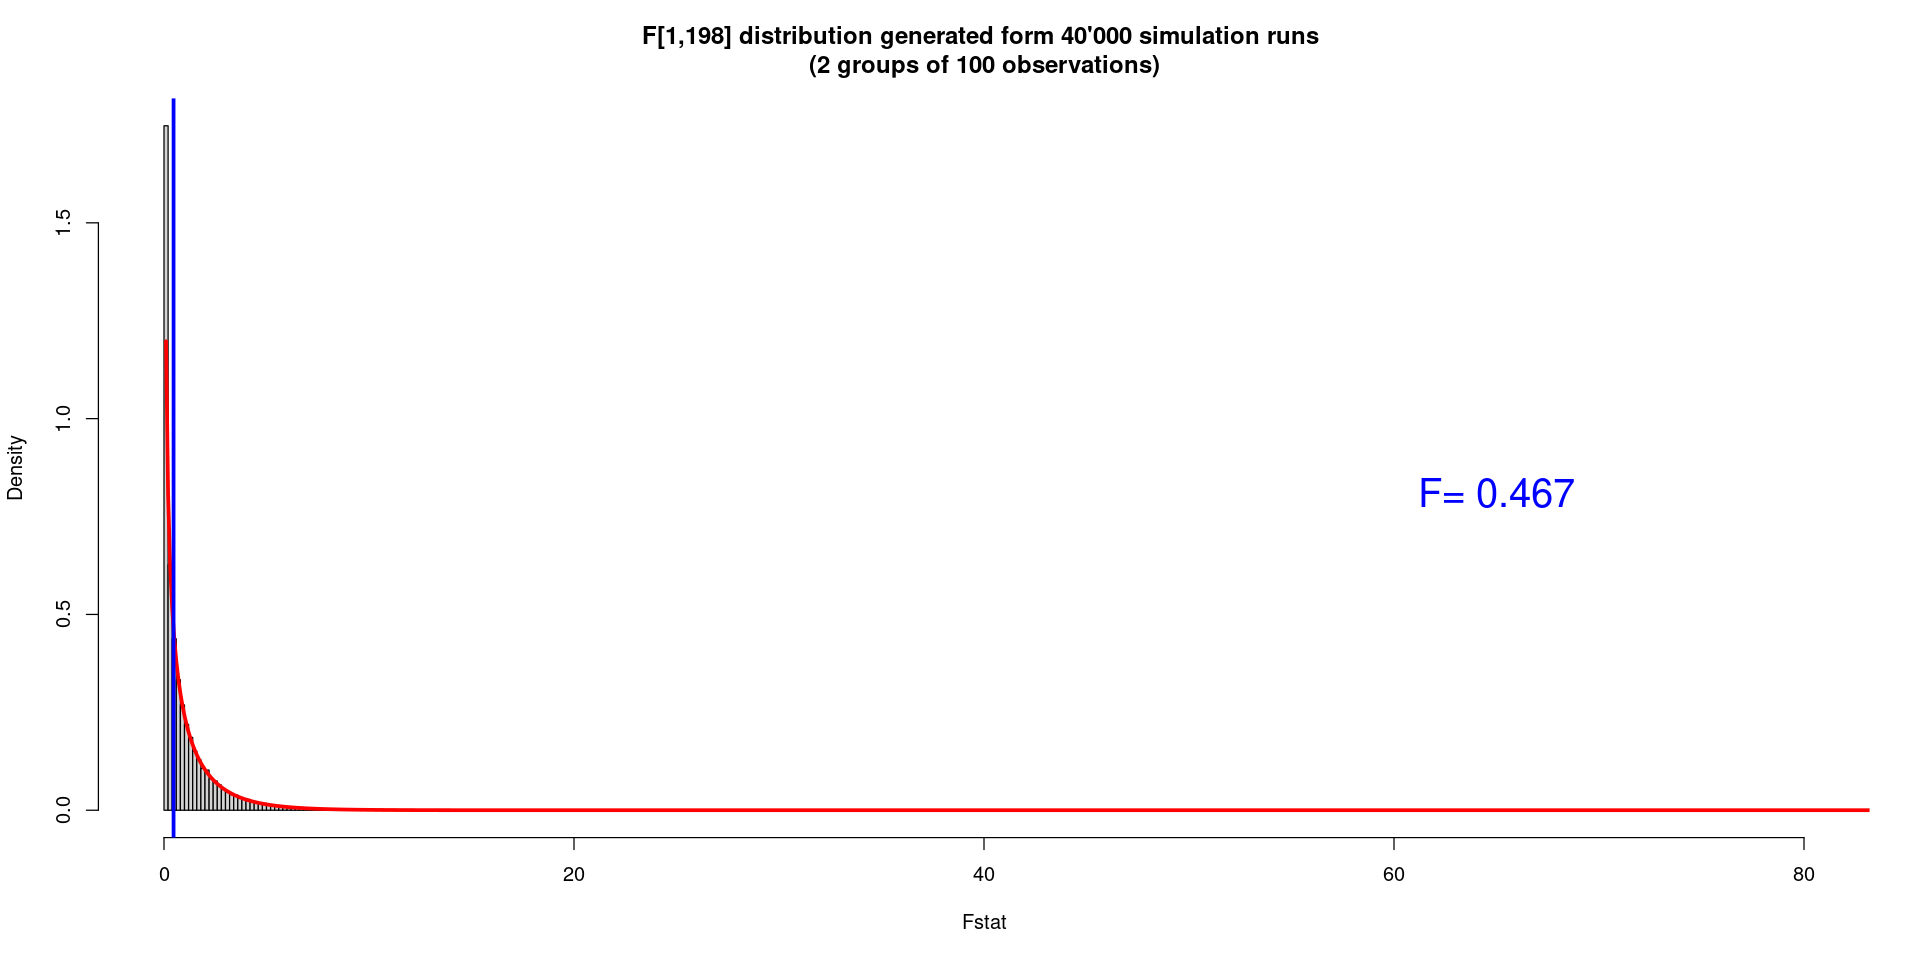

In [52]:
options(repr.plot.width=16, repr.plot.height=8)
par(mfrow=c(1,1)) # Plot figures in 1 x 1 matrix

# generate 4000 F statistics for 2 groups with equal means and variances
# adapted from https://www.clayford.net/statistics/explaining-and-simulating-an-f-distribution/
R <- 40000
Fstat <- vector(length = R)
for (i in 1:R){
  # 2 groups of 100 observations with equal means and variances (but the values are randomly generated)
  g1 <- rnorm(100, 0.3158647, 1.249249) # Group 1 = 100 observations, mean = 0.3158647, sd = 1.249249
  g2 <- rnorm(100, 0.3158647, 1.249249) # Group 1 = 100 observations, mean = 0.3158647, sd = 1.249249
  mse <- (var(g1)+var(g2))/2
  M <- (mean(g1)+mean(g2))/2
  msb <- (((mean(g1)-M)^2+
           (mean(g2)-M)^2)/1)*100
  Fstat[i] <- msb/mse
}

# plot a histogram of F statistics and superimpose F distribution (2, 57)
x <- seq(0,100,0.1)
hist(Fstat, freq=FALSE, 
     breaks=100,
     xlim=c(0, 80),
     main="F[1,198] distribution generated form 40'000 simulation runs \n(2 groups of 100 observations)")

# Determine the degrees of freedom for the F distribution
# 2 groups - 1 = 1; 200 observations - 2 groups = 198

# Plot the F distribution. 
curve(df(x, df1 = 1, df2 = 198), from = 0, to = 100, n = 1000, col= 'red', lwd=3, add = T)

abline(v=F, col="blue", lwd=3)
text(paste("F=", format(F, digits=3)),x = 60, y=0.8, col="blue", cex=2, pos = 4, offset=1)


## The ANOVA test

Given our observed F-ratio and the theoretical F-distribution for 2 groups (df1 = 2 groups - 1 = 1) of 100 observations (df2 = 200 observations - 2 groups = 198), we now can perform our test.

Under the "Null" hypothesis for the ANOVA, the F-ratio for 2 groups and a sample size of 200, which have the **same mean** and **same variance**, follows a F-distribution with [1,198] degrees of freedom.

* $H_0: \mu_1 = \mu_2 = ... = \mu_n$

The "Alternative" hypothesis is that:

* $H_1: \mu_1 \neq \mu_2 \neq ... \neq \mu_n$


## How to decide whether our F-ratio is "following" the F-distribution ?

### p-value
Our experiment produced a F-ratio which is rather extreme: there are only 0.0000000000014% of the theoretical F-ratios for such experiments that would be larger than the value we observed. This proportion is called the *p-value*: what is the probability to have drawn samples for our experiment which would produce a F-ratio larger than 57.3 It corresponds to the area under the curve to the right of F = 57.3


In [53]:
# pf gives the probability of getting an F value greater than F
p.value = pf(F, 1, 198, lower.tail = FALSE)
p.value


[1] 0.4953311

In social sciences, it is commonly accepted that to reject the null hypothesis, i.e. to say that our F-ratio does probably not stem from the theoretical F-distribition, it has to come from the 5% most extreme values. *This is called the alpha level*, written $\alpha=0.05$.

In our example $p = 1.411514e-12$ < < < $\alpha = 0.05$  and hence we **reject the Null hypothesis**. Therefore we conclude that the two samples do not belong to two populations with the same means. 

### our result: accept ! As 0.49 > 0.05

### Critical value
What is the F-ratio above which we can reject the Null hypothesis ? This value is called the *critical value* and corresponds to the F value for a probablity of $1-\alpha$, i.e. 0.95.


In [54]:
alpha = 0.05
F.critical = qf(1-alpha, df1=1, df2=198) 
F.critical


[1] 3.888853

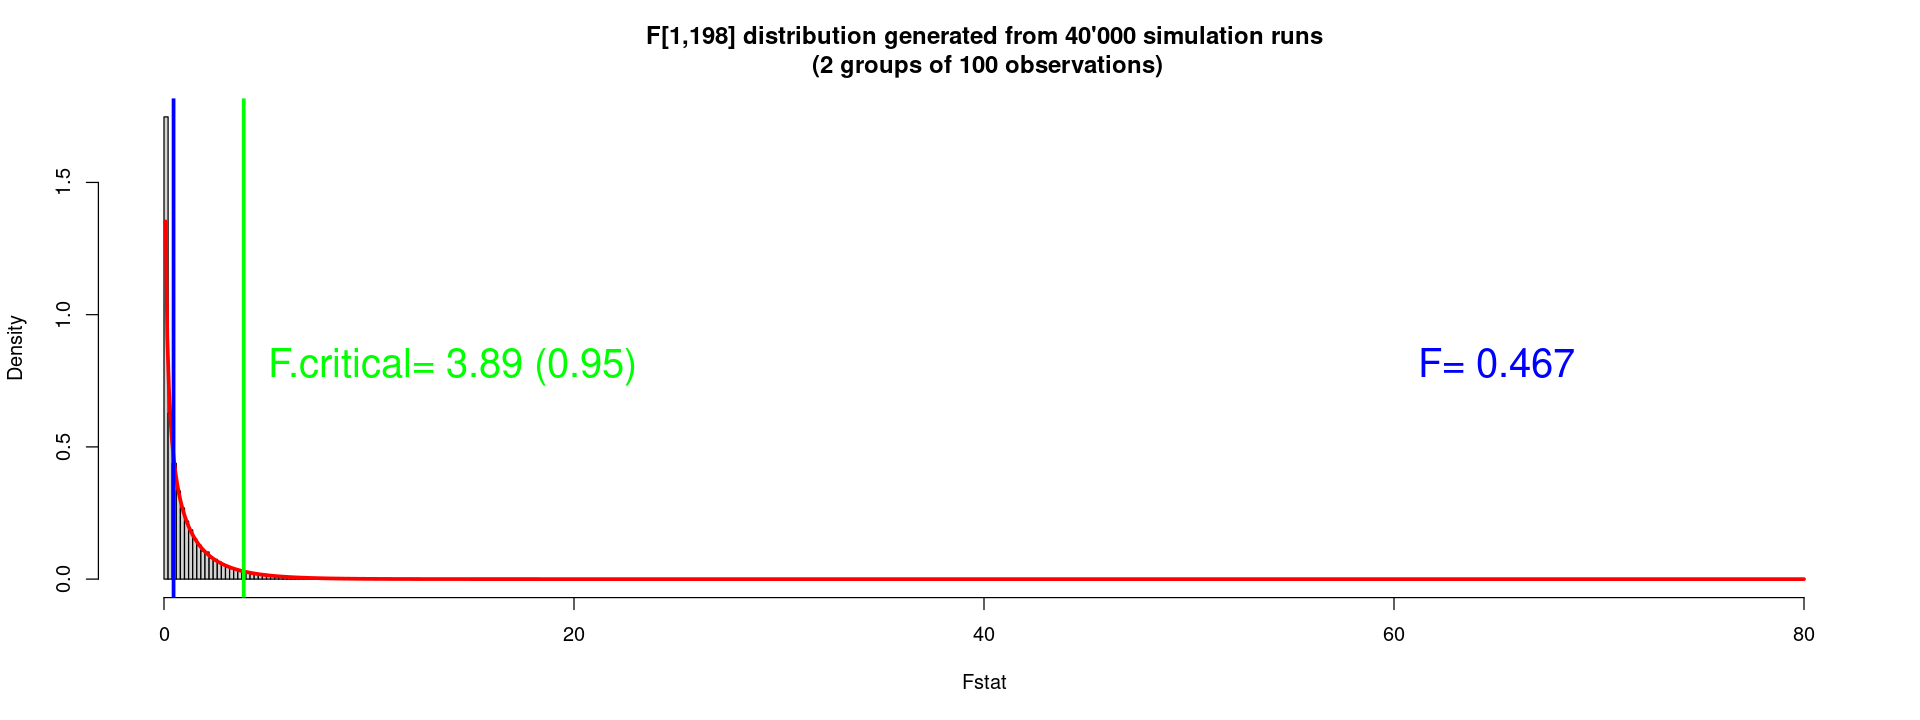

In [55]:
options(repr.plot.width=16, repr.plot.height=6)
par(mfrow=c(1,1)) # Plot figures in 1 x 1 matrix

# plot a histogram of F statistics and superimpose F distribution (2, 57)
x <- seq(0,100,0.1)
hist(Fstat, freq=FALSE, 
     breaks=100, 
     xlim=c(0, 80),
     main="F[1,198] distribution generated from 40'000 simulation runs\n (2 groups of 100 observations)")
# 3 groups - 1 = 2; 93 observations - 3 groups = 90
curve(df(x, df1 = 1, df2 = 198), from = 0, to = 80, n = 1000, col= 'red', lwd=3, add = T)

abline(v=F, col="blue", lwd=3)
text(paste("F=", format(F, digits=3)),x = 60, y=0.8, col="blue", cex=2, pos = 4, offset=1)

abline(v=F.critical, col="green", lwd=3)
text(paste("F.critical=", format(F.critical, digits=3), "(0.95)"),x = F.critical, y=0.8, col="green", cex=2, pos = 4, offset=1)

![F-distributions](./images/f-distributions.png)

Image taken from Hartmann, K., Krois, J., Waske, B. (2018): E-Learning Project SOGA: Statistics and Geospatial Data Analysis. Department of Earth Sciences, Freie Universitaet Berlin: https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/Continous-Random-Variables/F-Distribution/index.html



# ANOVA in R

Steps:

* Step 1: Build a linear model with DV ~ IV `model = lm(DV ~IV)`: 
* Step 2: Calculates type-II or type-III analysis-of-variance tables `Anova(model)` 
* Step 3: Check assumptions
  * Normality
  * Homoscedasticity


# Step 1 : build a linear model

NB: specify the contrasts that are used for the linear model as "contr.sum", which is not the default in R. 


In [56]:
model.0 <- lm(learning_gain ~ condition, 
              contrasts=list(condition=contr.sum),
              data=df)
summary(model.0)


Call:
lm(formula = learning_gain ~ condition, data = df, contrasts = list(condition = contr.sum))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5350 -1.2709 -0.3650  0.9141  4.1350 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1880     0.4874   4.489 0.000323 ***
condition1   -0.3330     0.4874  -0.683 0.503737    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.098 on 17 degrees of freedom
Multiple R-squared:  0.02672,	Adjusted R-squared:  -0.03054 
F-statistic: 0.4666 on 1 and 17 DF,  p-value: 0.5037


# Step 2: Look at the Anova "interpretation" of the model


In [57]:
library(car) # load library car first.
Anova(model.0, type="II")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
condition,2.053804,1,0.4666495,0.5037369
Residuals,74.819891,17,NA,NA


# Step 3: Check Assumptions

## Checking Normality assumptions

I present three methods to check the normality of the residuals for our linear model. 

* The Shapiro Wilks test (available as `shapiro.test()`)
* The Kolmogorov-Smirnov test (available as `ks.test()`) 
* a visual inspection test.


#### Shapiro.test : Testing Normality of residuals in each group

The Shapiro-Wilks test allows to test whether a variable is normally distributed. 

$H_0$: The sample is normally distributed.

$H_1$: The sample *is not* normally distributed. 


In [58]:
shapiro.test(model.0$residuals)



	Shapiro-Wilk normality test

data:  model.0$residuals
W = 0.94336, p-value = 0.3028


The p-value is larger than 0.05 and therefore we cannot reject the Null hypothesis. According to this test, the residuals from our model are normally distributed.

The `shapiro.test()` is very sensitive to deviations from normality, especially if the sample size is large. Textbooks usually recommend checking the normality assumption visually (with qq plots) rather than through tests.


#### Kolmogorov-Smirnov test: Testing normality of residuals

The Kolmogorov-Smirnov test allows to test whether two samples were drawn from the same distribution. This allows to compare our observations with a sample that follows a normal distibution with the same mean and standard deviation. This test is preferred to the Shapiro Wilks test for large samples.

$H_0:$ The two samples stem from the same distribution

$H_1:$ The two samples *do not* stem from the same distribution


In [59]:
x <- model.0$residuals
ks.test(x, "pnorm", mean(x, na.rm = T), sd(x, na.rm = T))


Warning message in ks.test.default(x, "pnorm", mean(x, na.rm = T), sd(x, na.rm = T)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  x
D = 0.15262, p-value = 0.768
alternative hypothesis: two-sided


The p-value is larger than 0.05, we therefore cannot reject $H_0$ and hence conclude that it is likely that the residuals follow a normal distribution.


In [60]:
plot.normal.ks <- function(sample1) {
    
    normal.sample <- rnorm(10000, mean(sample1, na.rm = T), sqrt(var(sample1, na.rm = T)))  # a normal sample that has the same mean and sd
    
    cdf1 <- ecdf(sample1)
    cdf2 <- ecdf(normal.sample)
    
    plot(cdf1, verticals = TRUE, do.points = FALSE, col = "blue", main="Empirical Cumulative Distribution Function")
    plot(cdf2, verticals = TRUE, do.points = FALSE, col = "green", add = TRUE)
    
    minMax <- seq(min(sample1, normal.sample, na.rm = T), max(sample1, normal.sample, na.rm = T), 
        length.out = length(sample1))
    x0 <- minMax[which(abs(cdf1(minMax) - cdf2(minMax)) == max(abs(cdf1(minMax) - cdf2(minMax))))]  # identify where the maximum difference is.
    y0 <- cdf1(x0)
    y1 <- cdf2(x0)
    points(c(x0, x0), c(y0, y1), pch = 16, col = "red")
    segments(x0, y0, x0, y1, col = "red", lwd = 5, lty = "solid")
    
    legend(-2, 0.8, legend=c("Sample", "Normal", "D: largest difference"),
           col=c("blue", "green", "red"), lty=c(1,1,1), lwd=c(1,1,5), cex=0.8)
    
}


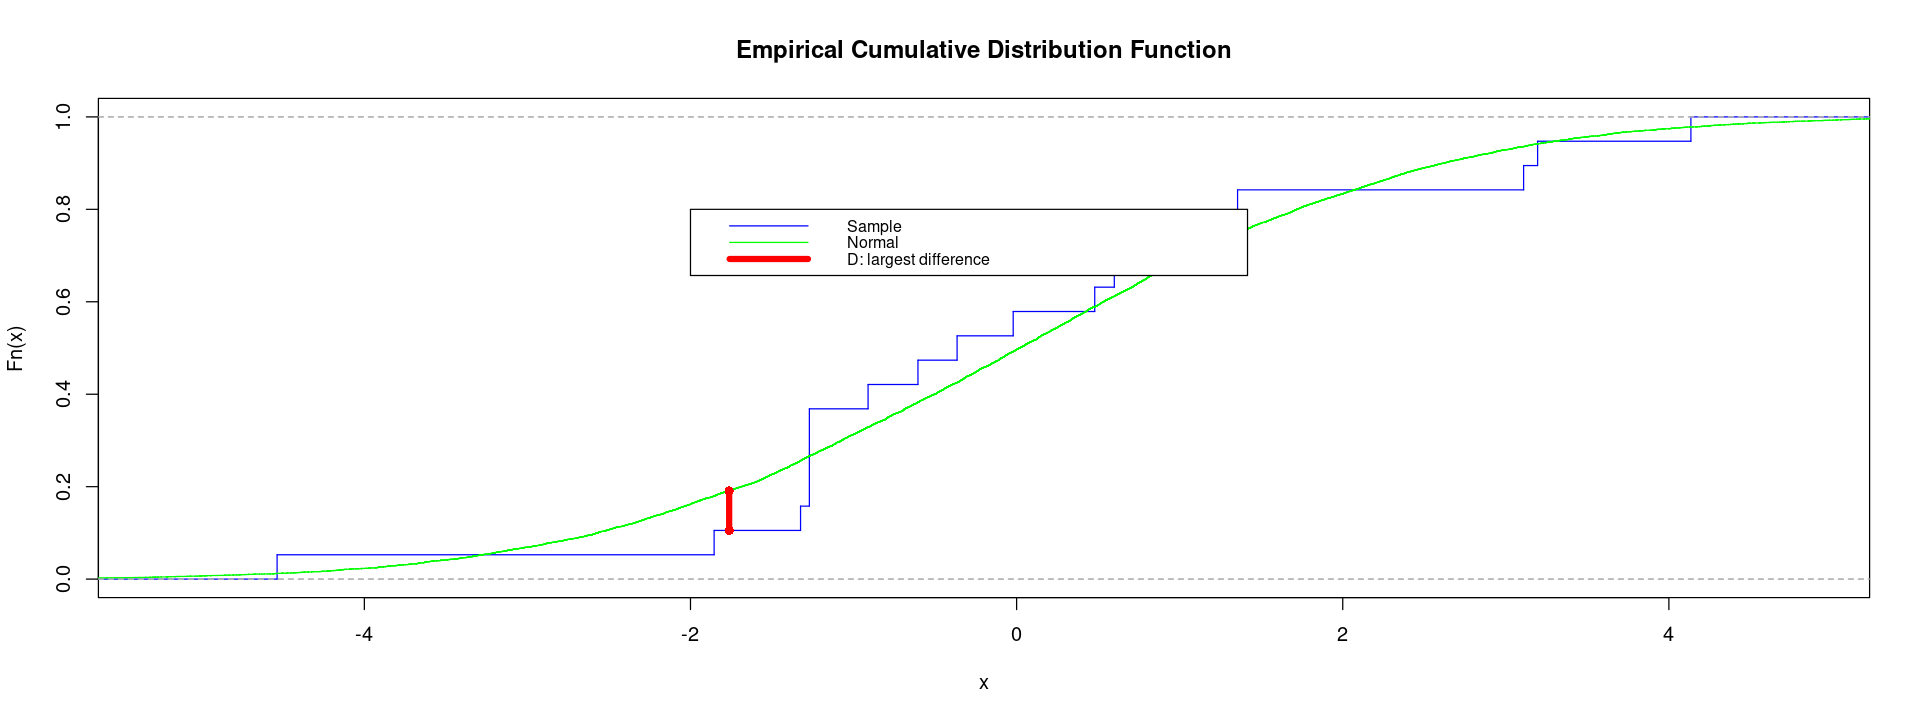

In [61]:
plot.normal.ks(model.0$residuals)


### Visually checking normality of residuals


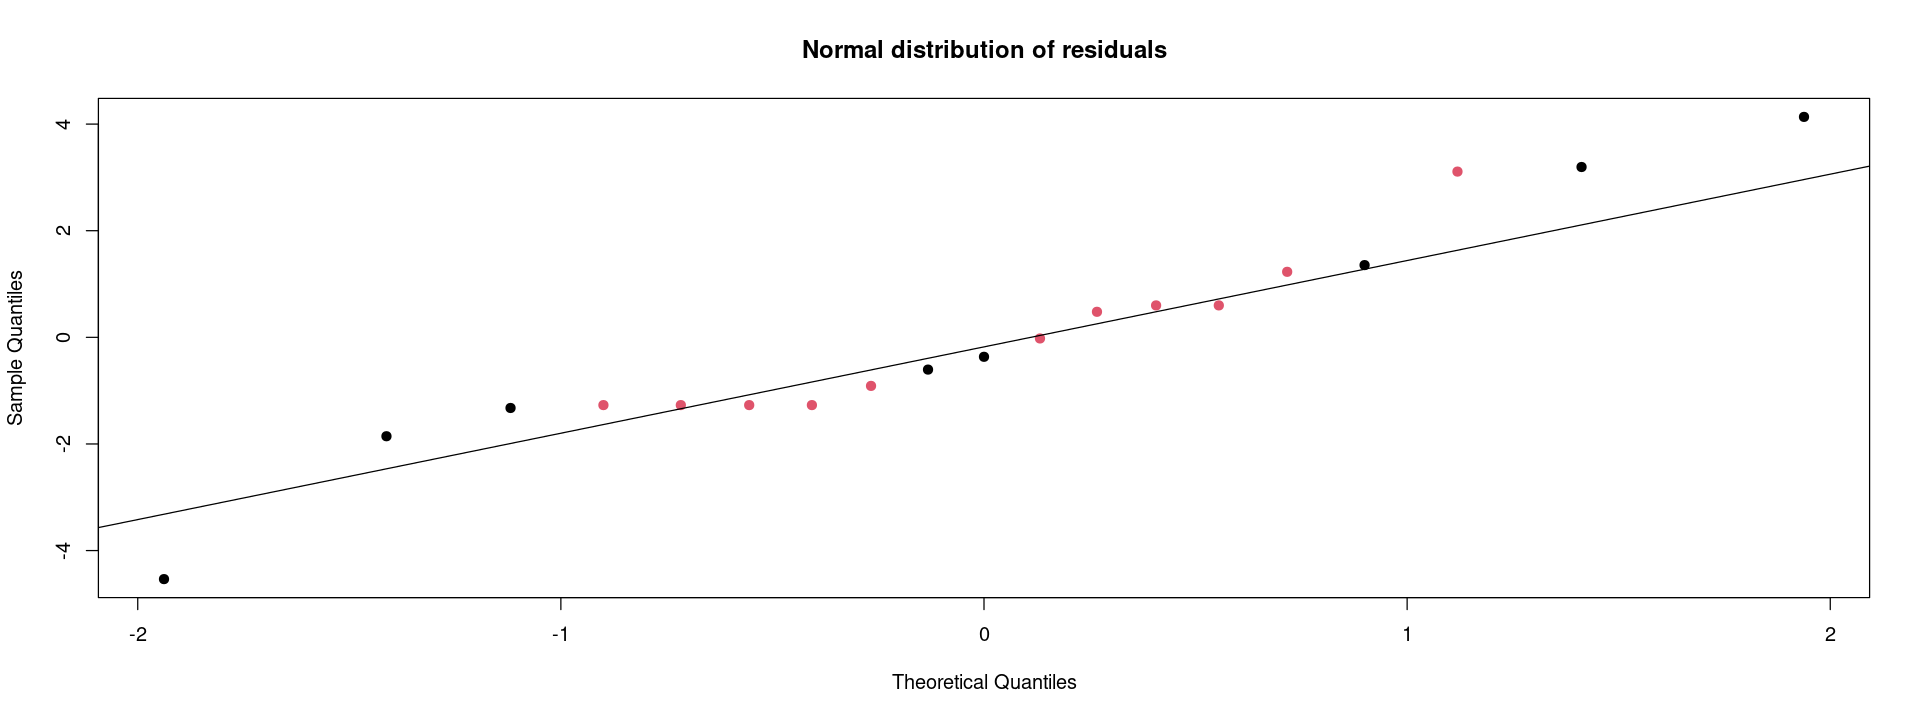

In [62]:
qqnorm(model.0$residuals, col=df$condition, pch=19, 
       main="Normal distribution of residuals")
qqline(model.0$residuals)


We would like to have the same variance of residuals across groups. This means that the model explains similarly well observations from both groups. If this was not the case, we'd have for example very similar errors for all observations in the IPS group and a larger variation of errors in the PSI group. This would indicate that there is something "wrong" in the measured data, e.g. all individuals from IPS have the same learning gain, whereas individuals from the PSI group have a spread of learning gains.    

Equality of variances can be tested with the `bartlett.test()` in R.

$H_0$: The variances are the same in the groups

$H_1$: The variances *are not* the same in the groups


In [63]:
bartlett.test(residuals(model.0) ~ df$condition)


	Bartlett test of homogeneity of variances

data:  residuals(model.0) by df$condition
Bartlett's K-squared = 3.8401, df = 1, p-value = 0.05004


In our case, the p-value is much larger than .05 which does not allow us to reject the null hypothesis $H_0$. Hence we conclude that the variances are equal in both groups. 


#### Visual inspection of equal variances

An alternative was to check for equality of variances conists of plotting boxplots of the residuals. If the shape of the boxplots is more or less the same, the variances are more or less equivalent. 


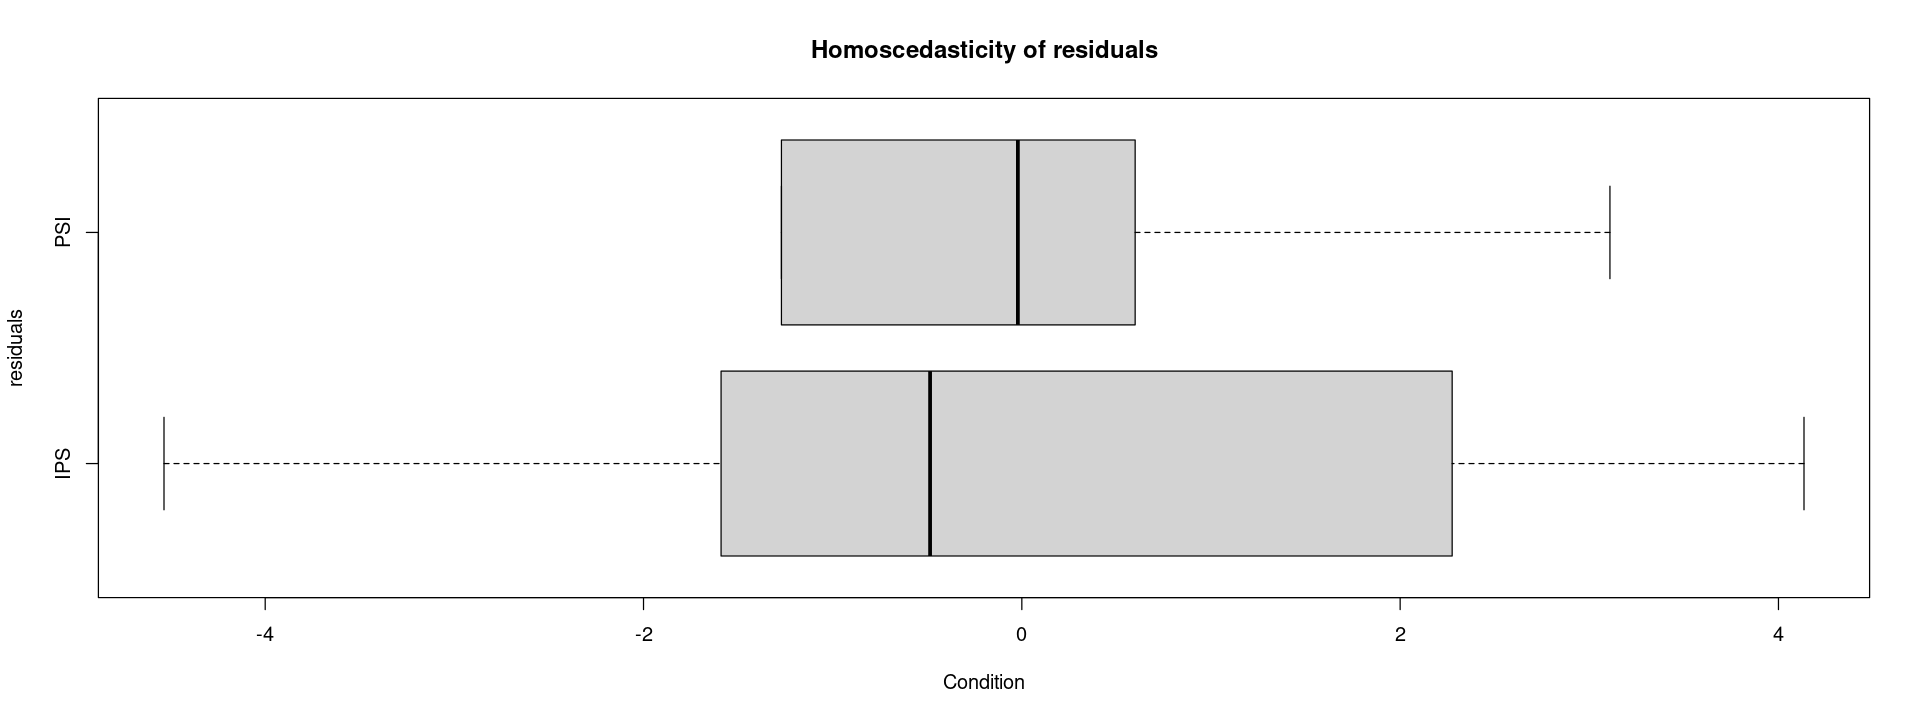

In [64]:
boxplot(model.0$residuals ~ df$condition, 
        main="Homoscedasticity of residuals",
        ylab="residuals",
        xlab="Condition", horizontal=TRUE)


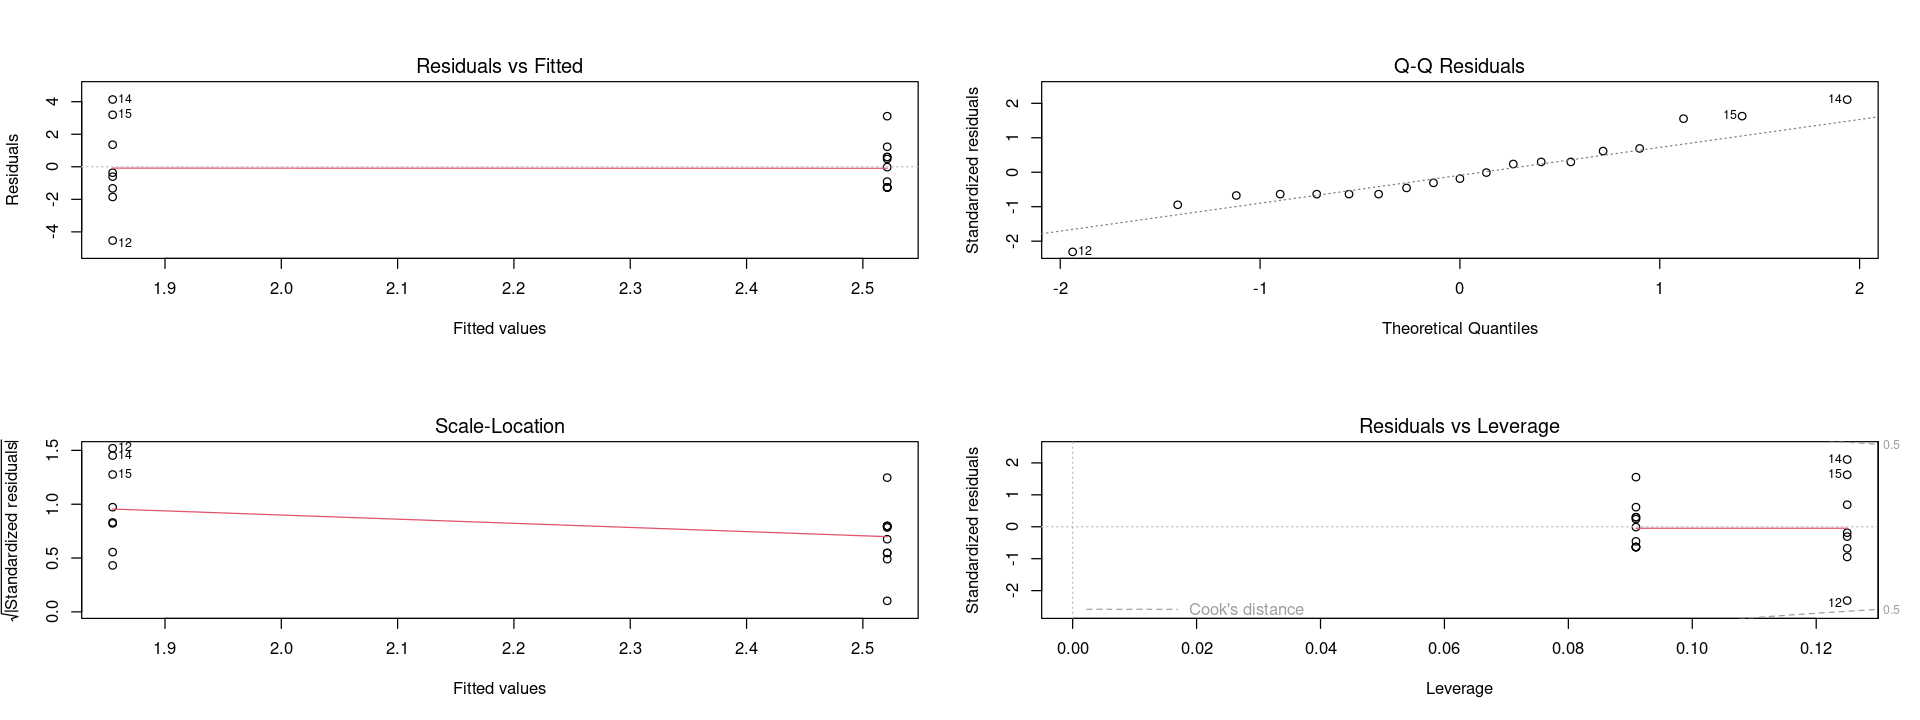

In [65]:
par(mfrow=c(2,2))
plot(model.0)
par(mfrow=c(1,1))


# How would these graphs look if they were not normally distributed ?


	Shapiro-Wilk normality test

data:  x
W = 0.94397, p-value = 5.156e-07


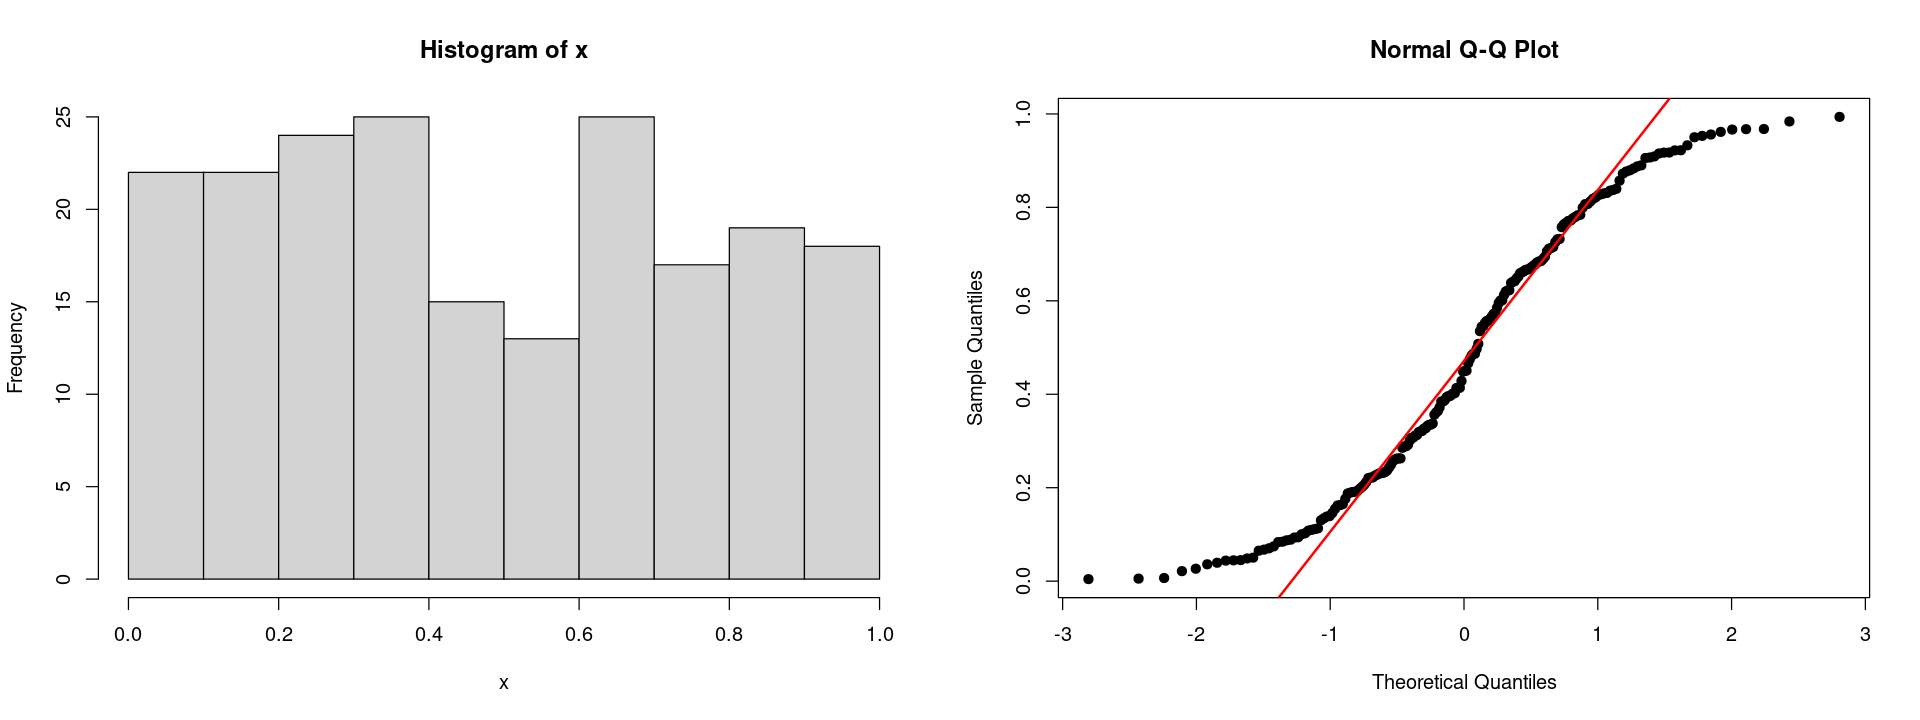

In [66]:
x <- runif(200)

shapiro.test(x)

par(mfrow=c(1,2))
hist(x)
qqnorm(x, pch=19)
qqline(x, col="red", lwd=2)
par(mfrow=c(1,1))


# How would these graphs look if they did not have equal variances ?



	Bartlett test of homogeneity of variances

data:  d$x by d$cond
Bartlett's K-squared = 85.857, df = 1, p-value < 2.2e-16


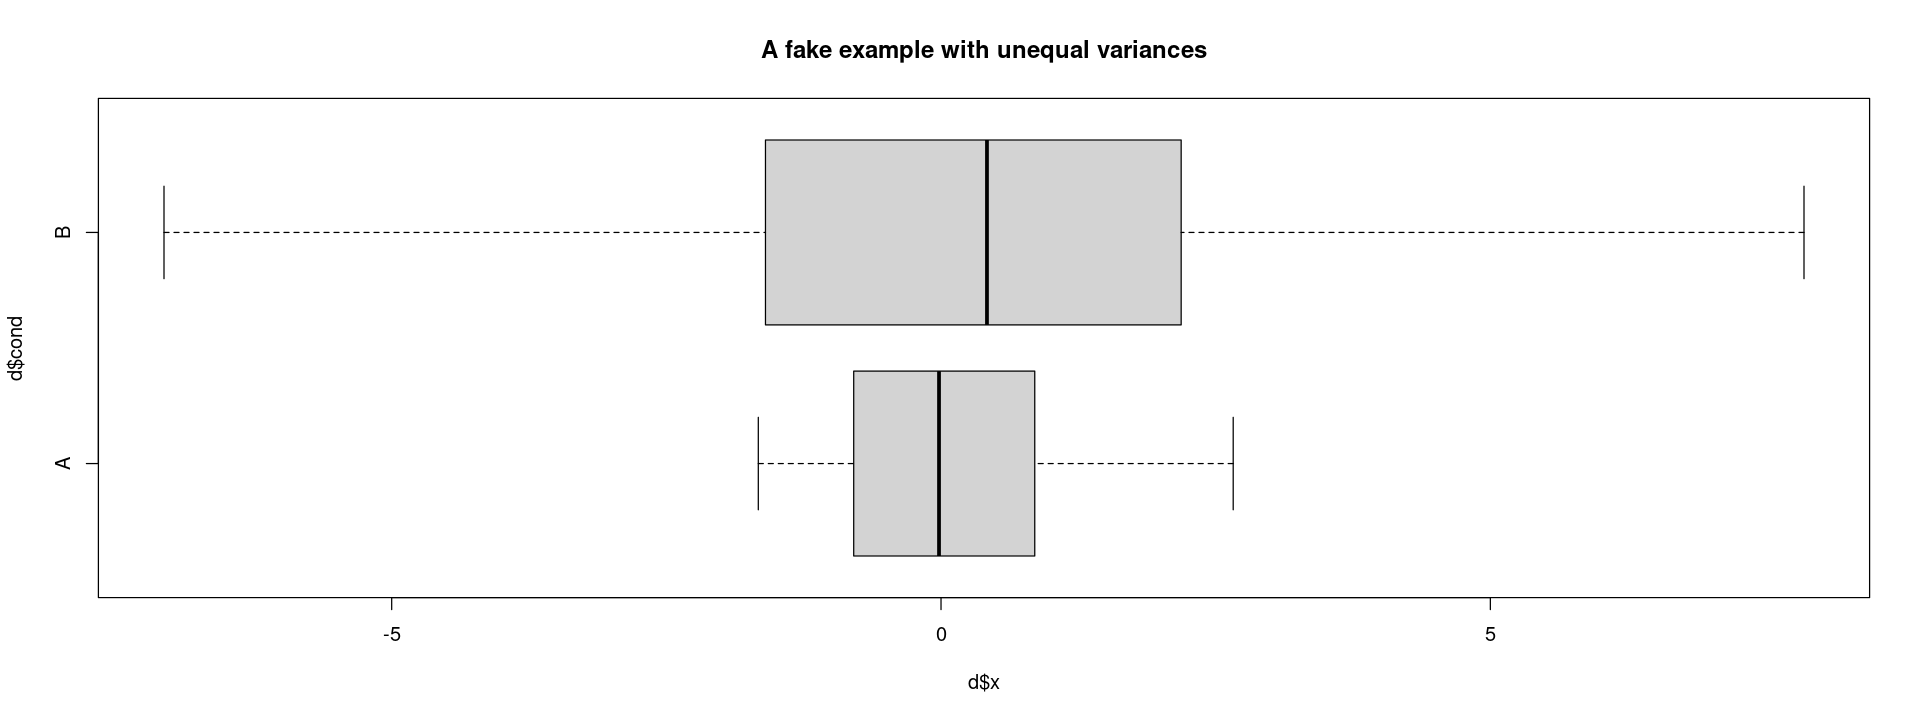

In [67]:
x1 <- rnorm(100,mean = 0, sd = 1)
x2 <- rnorm(100,mean = 0, sd = 3)
x <- c(x1, x2)
cond <- c(rep("A",100), rep("B",100))
d <- data.frame(cond, x)

bartlett.test(d$x ~ d$cond)

boxplot(d$x ~ d$cond, horizontal=TRUE, main="A fake example with unequal variances")


## What if assumptions are not met ?

**Normality**: ANOVA is said to be pretty robust against deviations of normality, which means that the validity of p-values are not too much affected by skew (the distribution is asymetric) or kurtosis (the distribution is too heavy or too light tailed).

=> Data Transformation. Trying to transform the dependent variable so that the distribution approaches normality, by taking 1/x, log(x) or sqrt(x).

=> Using a non-parametric equivalent for ANOVA: Kruskall-Wallis rank test. 

**Equality of variance**: Deviations for the equality of variance have most impact on the result of the ANOVA if the group sizes are unequal. 

=> Using the Welch correction for `oneway.test()` by specifying `var.equal=FALSE`.



### Running a non-parametric Kruskall-Wallis as an alternative

The principle for the Kurskall Wallis test is very similar to the idea behind ANOVA. The difference is that rather than using the raw scores, the Kruskall-Wallis test relies on **ranks**. This test does **not make assumptions** about the distribution of the residuals, nor about the variances.

$H_0$: The mean ranks of the groups are the same.

$H_1$: The mean ranks of the groups *are not* the same.

The decision variable:

$\large H = (N-1) \frac{\sum_{i=1}^{g}n_i(\bar{r_{i\cdot}} - \bar{r})^2}{\sum_{i=1}^{g}\sum_{j=1}^{n_i}(\bar{r_{ij}} - \bar{r})^2}$ ~ $\large \chi^2_{[g-1]}$



In [68]:
kruskal.test(learning_gain ~ condition, data=df)



	Kruskal-Wallis rank sum test

data:  learning_gain by condition
Kruskal-Wallis chi-squared = 0.44455, df = 1, p-value = 0.5049


From the results of the test we see that we can reject the Null hypothesis (p < .05) and therefore conclude that the mean ranks are different among the two groups.
### we cant


## ANOVA with 2 factors

We now add a control variable (`age.group`) as a new factor to the ANOVA. This introduces the possibility for interaction between variables.

In order to test for a potential moderation effect (the effect of the condition varies depending on another variable), we include interaction effects in the linear model. 

The total variance is now decomposed into:

$SS Total = SS Factor 1 + SS Factor 2 + SS Interaction +  SS Within$

The degrees of freedom for an interaction effect between 2 variables with k and m levels are $(k-1)(m-1)$, with condition and gender: $(2-1)(2-1) = 1$ and with condition and age group $(2-1)(3-1)=2$.


In the specification of the model, the interaction between 2 factors is written with a column as in  `condition:age.group`.  


In [70]:
model.2 <- lm(learning_gain ~ 
                condition + 
                studies +
                condition:studies,
              contrasts=list(condition=contr.sum, studies=contr.sum),
              data=df)
summary(model.2)



Call:
lm(formula = learning_gain ~ condition + studies + condition:studies, 
    data = df, contrasts = list(condition = contr.sum, studies = contr.sum))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9525 -0.5725 -0.0425  0.6033  4.7175 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.57264    0.54070   4.758 0.000374 ***
condition1           0.05708    0.54070   0.106 0.917532    
studies1            -1.11014    0.68834  -1.613 0.130795    
studies2            -0.56097    0.73096  -0.767 0.456529    
condition1:studies1 -0.24708    0.68834  -0.359 0.725392    
condition1:studies2 -0.50208    0.73096  -0.687 0.504226    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.087 on 13 degrees of freedom
Multiple R-squared:  0.2635,	Adjusted R-squared:  -0.01974 
F-statistic: 0.9303 on 5 and 13 DF,  p-value: 0.4927


In [71]:
Anova(model.2, type="III")


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),98.59239339,1,22.63859307,0.0003740089
condition,0.04854052,1,0.01114578,0.9175323277
studies,17.91623236,2,2.05694517,0.1674422110
condition:studies,3.40637151,2,0.39108219,0.6840195652
Residuals,56.61575833,13,NA,NA


# Is there an interaction ?

* When there is an interaction, we use **type III sums of squares** and don't interpret main effects.
* If there are no interactions, switch to a model that only includes main effects and use **type II sums of squares**. 


# Interpreting interactions

## Age Group


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


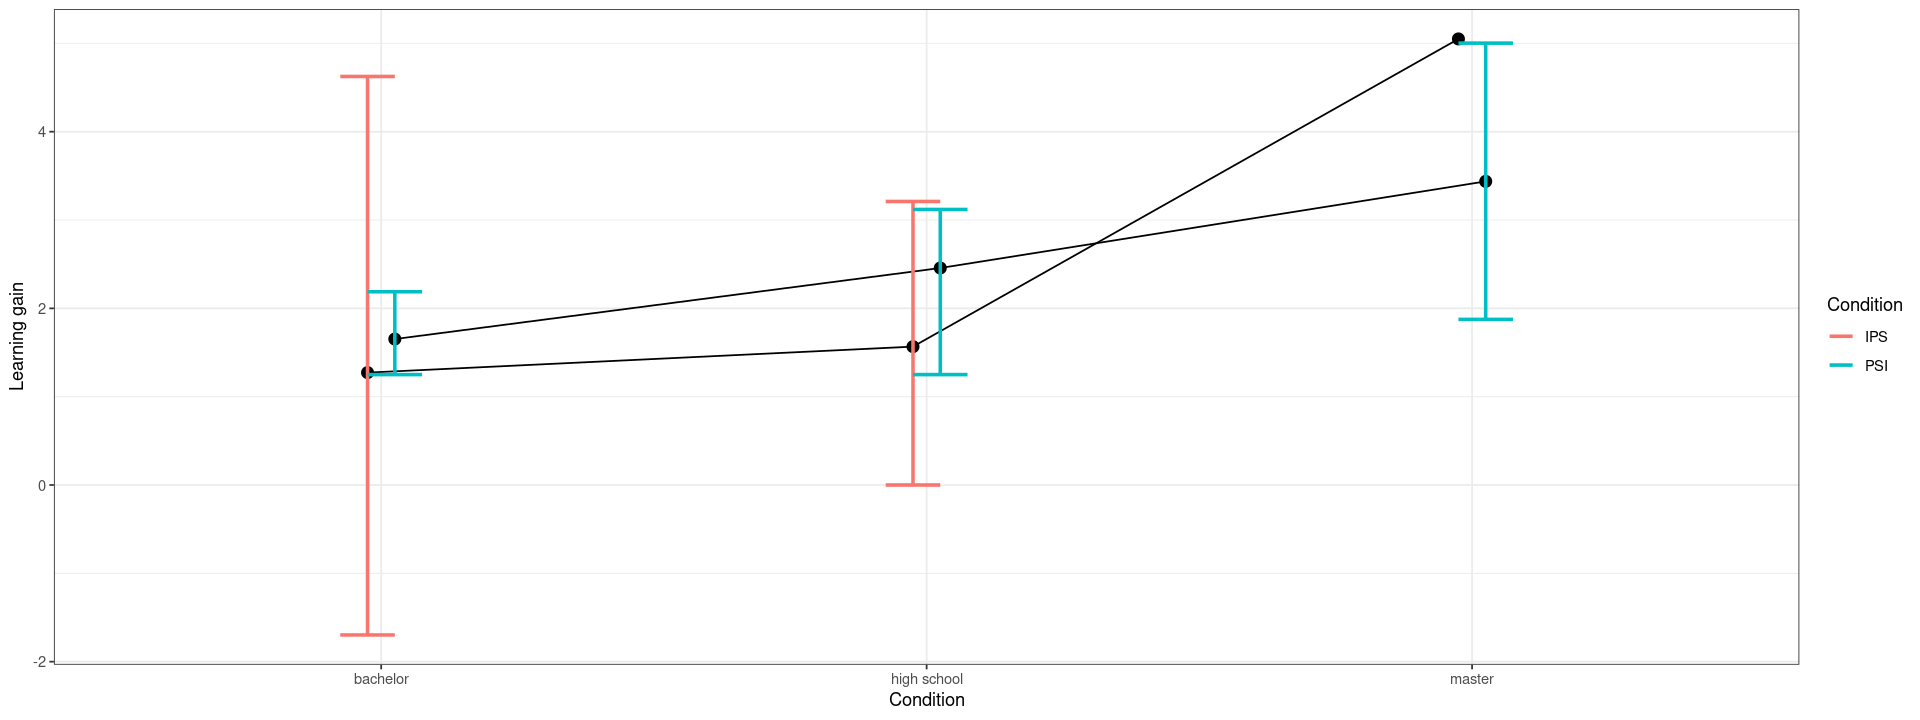

In [72]:
pd = position_dodge(width = 0.1)

gp <- df %>% ggplot(aes(x = studies, y = learning_gain, group = condition)) +
 geom_line(stat = "summary", fun = "mean", position = pd) +
 geom_point(stat = "summary", fun = "mean", position = pd, size = 3) +
 stat_summary(fun.data = "mean_cl_boot", size = 1, position = pd, geom = "errorbar",
    width = 0.2, aes(colour = condition)) +
   theme_bw() +
  xlab("Condition") +
  ylab("Learning gain") + 
  scale_colour_discrete(name = "Condition")

gp
ggsave(gp, file="condition-age.group-interaction.png", width=6, height=4)


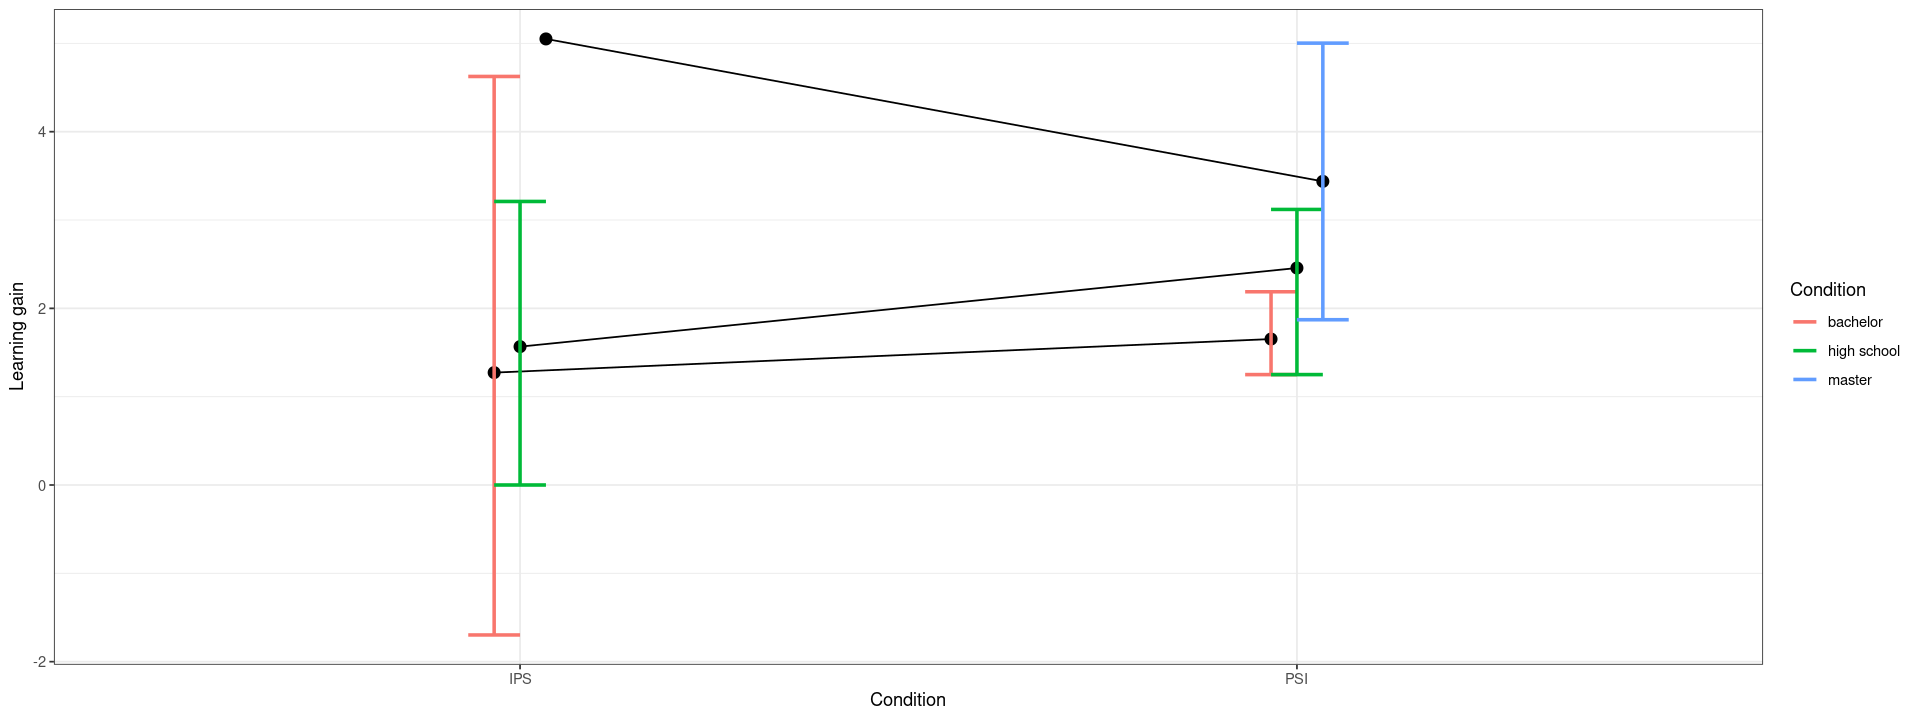

In [73]:
gp <- df %>% ggplot(aes(x = condition, y = learning_gain, group = studies)) +
 geom_line(stat = "summary", fun = "mean", position = pd) +
 geom_point(stat = "summary", fun = "mean", position = pd, size = 3) +
 stat_summary(fun.data = "mean_cl_boot", size = 1, position = pd, geom = "errorbar",
    width = 0.2, aes(colour = studies)) +
   theme_bw() +
  xlab("Condition") +
  ylab("Learning gain") + 
  scale_colour_discrete(name = "Condition")


gp
ggsave(gp, file="age.group-condition-interaction.png", width=6, height=4)


# Reporting the ANOVA with interaction

A two way ANOVA was conducted with the experimental condition, and the control variable age group. We tested for interactions between the condition and the control variables. There was a significant interaction effect between condition and age group (F[2,194]=4.1177, p =.0104). Inspection of the graphical patterns of the means indicates that the PSI condition worked especially well for students in comparison with kids and professionals.  


# Gender

Let's do the same analysis with the control variable `gender`. We start with a model that contains the interaction term (type III). Since there is no interactions between the factors, we re-run the model without interaction and use type II sums of squares.


In [74]:
model.with.interaction <- lm(learning_gain ~ condition + python + condition:python, 
              contrasts=list(condition=contr.sum, python=contr.sum),
              data=df)

Anova(model.with.interaction, type="III")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),47.729986,1,11.6648189,0.00383483
condition,2.900503,1,0.7088593,0.41304536
python,2.264050,1,0.5533153,0.46845904
condition:python,11.367968,1,2.7782386,0.11629127
Residuals,61.376846,15,NA,NA


In [75]:
model.without.interaction <- lm(learning_gain ~ condition + python, 
              contrasts=list(condition=contr.sum, python=contr.sum),
              data=df)

Anova(model.without.interaction, type="II")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
condition,2.279974,1,0.5014734,0.4890423
python,2.075077,1,0.4564068,0.5089552
Residuals,72.744814,16,NA,NA


## Gender


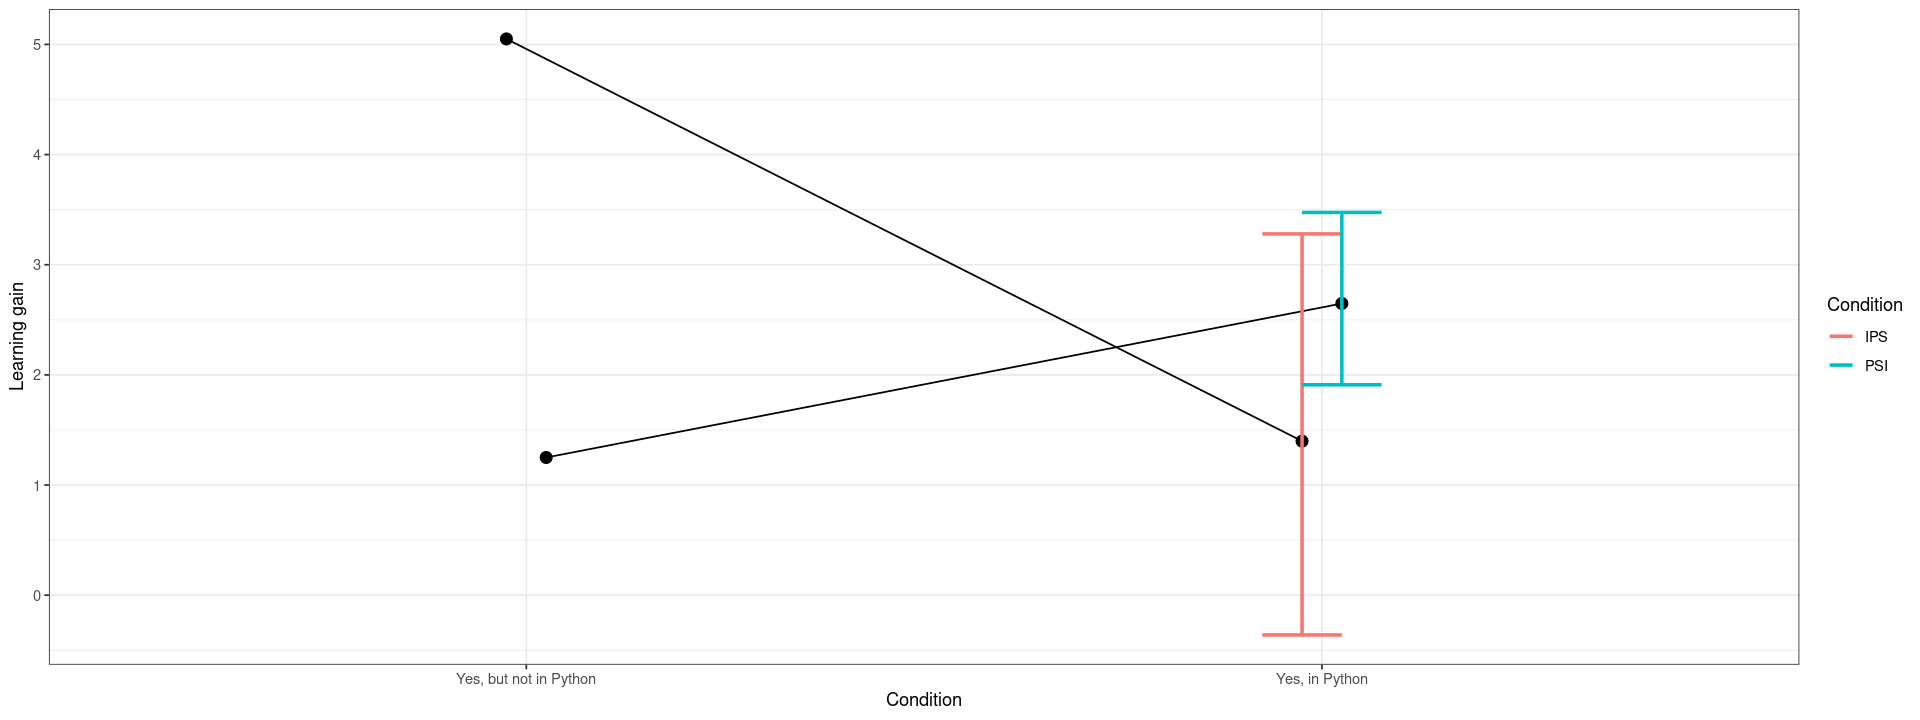

In [76]:
gp <- df %>% ggplot(aes(x = python, y = learning_gain, group = condition)) +
 geom_line(stat = "summary", fun = "mean", position = pd) +
 geom_point(stat = "summary", fun = "mean", position = pd, size = 3) +
 stat_summary(fun.data = "mean_cl_boot", size = 1, position = pd, geom = "errorbar",
    width = 0.2, aes(colour = condition)) +
   theme_bw() +
  xlab("Condition") +
  ylab("Learning gain") + 
  scale_colour_discrete(name = "Condition")


gp
ggsave(gp, file="condition-gender-interaction.png", width=6, height=4)


# Reporting the ANOVA without interaction


In [77]:
tapply(df$learning_gain, df$condition, mean)
tapply(df$learning_gain, df$condition, sd)


IPS      PSI 
1.855000 2.520909

IPS      PSI 
2.813346 1.393395

A two way ANOVA was conducted with the experimental condition, and the control variable gender. There was no interaction effect between condition and gender. There is a main effect of the experimental condition (F[1,197]=56.306, p<.000). The subjects in the PSI group had a larger learning gain (M=0.918, sd=1.07) than the subjects in the IPS group (M=-0.262, sd=1.13). There was no main effect of gender (F[1,197]=1.98, p > .05).
